## Exploration of magnetic ordering using neutron diffraction

**1 - Introduction**

A material is said to be antiferromagnetic if, when exposed to a magnetic field, the magnetic moments of the atoms align with opposite spin to their nearest neighbours. $^{[1]}$ This means that the magnetic unit cell size doubles and that, using radiation that is sensitive to magnetism, the diffraction pattern of such beams using the material as a diffraction grid changes significantly. For the materials who exhibit this behaviour, we observe antiferromagnetic properties under a certain temperature characteristic of the material itself, called  Néel Temperature, and paramagnetic properties above that temperature. $^{[2]}$ 

The data that has been analyzed contains information about the diffracted intensity as a function of d-spacing, i.e. the spacing between two adjacent lattice planes. This is because the diffraction pattern will exhibit peaks in correspondence of constructive interference, which occurs every time $m\lambda = 2d\sin\theta$, as described by Bragg's Law, making it linearly dependent on the above quantity called $d$ in the formula. To make this easier, we only focus on the first peak, i.e. the one for m = 1.  

From the data we should be able to clearly see that the higher the temperature, the broader the interference pattern. This is a consequence of the fact that the diffracted intensity is the modulus squared of the fourier transform of a function which describes the crystal structure of the material we are using. This means that for smaller cell sizes we will obtain broader diffraction intensity curves. Since our antiferromagnetic properties are stronger with lower temperature and make the magnetic cell size bigger, the observed pattern should follow from this.$^{[3]}$

We are interested in confirming that the material used indeed exhibits antiferromagnetic properties and in calculating the parameters of the curve that describes the magnetization of the material used. From what we know we can predict that this will be a function of temperature as long as the temperature is below the Néel Temperature and a constant above it. This is because the magnetization can be obtained by integrating the diffraction intensity as a function of the d-spacing. It is intuitively easy to see that the curve that we are going to fit to this data should be of the kind: 

$$
M(T) = \begin{cases}A(T_0 - T)^\beta + B & T < T_0 \\ B & T \geq T_0\end{cases}.
$$

where the quantities that appear are the Néel Temperature $T_0$, the constant background $B$, the amplitude of the signal $A$ and the critical exponent $\beta$. 

**2 - Methods**

In this report, we are analyzing data from neutron diffraction data collected at ISIS, the UK’s national neutron source, since it is a kind of radiation sensitive to magnetism. The material used is methylammonium cobalt(II) formate (CH3NH3Co(HCO2)3).

To analyze the data, first we have to import it into our notebook. This is easily done by using the loadtxt command from numpy, a module which will prove to be also useful in giving us commands to deal with arrays. We are also going to need to import the pyplot module from the mathplotlib notebook, which can be imported by using a magic command, to acquire the commands to plot our graphs. Here I first import the pyplot module and then the matplotlib notebook in order to obtain tidier graphs. The data is currently contained into text files, one for each of the temperatures the data has been collected at, divided into two columns: the first one is the d-spacing data, the second one the diffracted intensity. After having imported them in data_N, where N is the corresponding temperature, I will split them into two arrays, one for the d-spacing (x_data_N) and one for the intensity (y_data_N).    

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib notebook

data_2 = np.loadtxt(f"project2_data/data_02.0K.txt") #here I am specifying the format I want the data to be imported in, i.e. f for float
x_data_2 = data_2[:,0]
y_data_2 = data_2[:,1]

data_5 = np.loadtxt(f"project2_data/data_05.0K.txt")
x_data_5 = data_5[:,0]
y_data_5 = data_5[:,1]

data_10 = np.loadtxt(f"project2_data/data_10.0K.txt")
x_data_10 = data_10[:,0]
y_data_10 = data_10[:,1]

data_14 = np.loadtxt(f"project2_data/data_14.0K.txt")
x_data_14 = data_14[:,0]
y_data_14 = data_14[:,1]

data_20 = np.loadtxt(f"project2_data/data_20.0K.txt")
x_data_20 = data_20[:,0]
y_data_20 = data_20[:,1]

data_30 = np.loadtxt(f"project2_data/data_30.0K.txt")
x_data_30 = data_30[:,0]
y_data_30 = data_30[:,1]

data_50 = np.loadtxt(f"project2_data/data_50.0K.txt")
x_data_50 = data_50[:,0]
y_data_50 = data_50[:,1]

In order to integrate our diffracted intensities, we will need to define a function that uses the trapezoid method of integration and that works well with uneven spacing. This will take as arguments an array containing the unevenly spaced values of the independent variable and a second array contaning the values of the dependent variable evaluated at the values of the independent variable, in this order. In our case, the independent variable is the d-spacing and the dependent variable is the diffracted intensity. The function then creates an array of uneven spacing, our "bases" of the trapezoids, and multiplies each of them by the corresponding value of the function y at the right of the interval, our "heights" of the trapezoids. The sum of the areas of our trapezoids will give us the integral we seek.      

Having defined this function, we proceed to calculate the integrals of the diffraction intensities at each temperature, which we will insert in an array called "int_vec" in order to then plot the integrated diffraction intensity as a function of temperature. I have chosen here not to include the data corresponding to the temperature 2.0 K for a reason that will be explained once the intensity graph is plotted. 

In [2]:
def trapezoid(x, y):
    """This function integrates the array of values of the function y using the trapezoid rule. To do this, it creates an 
    array contaning the uneven spacings by subtracting pairs of consecutive values of the x array and then it operates a 
    scalar product between this new vector and the array of the function y. 
    y: array of dependent variable evaluated at uneven spacing
    x: array of unevenly spaced values of the independent variable 
    h: vector of uneven spacing between data points"""
    h = np.zeros(len(x)) 
    for i in range(1, len(x)):
        h[i] = x[i] - x[i-1]
    return sum(y*h)

""""Here I use the commands I imported with the numpy module in two ways: the first one is to create an array from a list of elements which relationship is not periodic, i.e. that 
are not for example all at the same distance from each other or multiples of the same number. The second one is to create an array of dimension 6 containing all zeroes in order to 
then change its values to the desired ones, namely the values I obtain by integrating the data sets using the trapezoid function."""

t_vec = np.array([5.0,10.0,14.0,20.0,30.0,50.0])
int_vec = np.zeros(6)

int_vec[0] = trapezoid(x_data_5, y_data_5)
int_vec[1] = trapezoid(x_data_10, y_data_10)
int_vec[2] = trapezoid(x_data_14, y_data_14)
int_vec[3] = trapezoid(x_data_20, y_data_20)
int_vec[4] = trapezoid(x_data_30, y_data_30)
int_vec[5] = trapezoid(x_data_50, y_data_50)

Obtained our integrated intensity, we will have to define the function we want to fit to these values. It will take as arguments the array of the new independent variable, the temperature, and the parameters of Amplitude, Néel Temperature, Critical Exponent and Background in this order. We define it like this because we are going to use the curve_fit command from the scipy.optimize module, which requires the function to be written with a separate agument for each of the parameters it has to tune. In order to make use of it, we will have to import the desired module.$^{[4, 5]}$  

In [3]:
def M(T, A, T0, beta, B ): 
    """This defines a function of the parameters A, T0, beta, B (taken as separate arguments in order to use the curve_fit 
    function) and the variable T. Since we are working with arrays, we would incur in an error if we tried to elevate a 
    negative number to a fractional exponent. The workaround used here is to take the absolute value of the number, elevate 
    it to the power and then multiply the result by the intial sign."""
    return np.where(T < T0, A*np.sign(T0 - T)*(np.abs(T0 - T))**beta + B, B)

import scipy.optimize as op

**4 - Results and Discussion**

By plotting the interference pattern as a function of the d-spacing for each temperature we have data at, we can clearly see that the higher the temperature, the broader the curve and thus we get confirmation that the magnetic unit cell size becomes bigger below the Neel Temperature and that the effect becomes more accentuated the lower the temperature. The material indeed exhibits an additional peak due to its antiferromagnetic properties. The only set of data that diverges from this behaviour is the one obtained at temperature 2.0 K. After using the legend command to display the legend, I inserted a semicolon to suppress the text output we are not interested in seeing displayed. 

'Here I have inserted the semicolon to suppress the written output of the legend command. This means that we will only have the legend picture into the graph and not a piece\nof text which says what is contained in the legend. I will do this each time I use the legend command.'

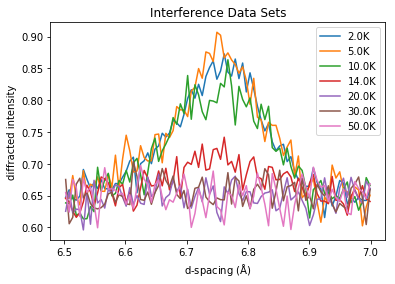

In [4]:
"""Here I am plotting the data I obtain by specifying the figure I want to open to insert my graphs into, then I use the plot command (which takes as arguments the independent
variable data set and the dependent variable data set) without opening a new figure in order to have all my data values in the same graph. I use the label optional argument to 
clearly mark which data set has been taken at each temperature at a single glance from the graph, which I then make sure is displayed by using the legend command. I also used 
the xlabel and ylabel commands to label the axes and the title command to insert a title to the graph. All these commands are taken from the matplotlib notebook we imported
before."""

plt.figure(1)
plt.plot(x_data_2, y_data_2, label='2.0K')
plt.plot(x_data_5, y_data_5, label='5.0K')
plt.plot(x_data_10, y_data_10, label='10.0K')
plt.plot(x_data_14, y_data_14, label='14.0K')
plt.plot(x_data_20, y_data_20, label='20.0K')
plt.plot(x_data_30, y_data_30, label='30.0K')
plt.plot(x_data_50, y_data_50, label='50.0K')

plt.xlabel("d-spacing ($\mathrm{Å}$)")
plt.ylabel("diffracted intensity")
plt.title("Interference Data Sets")
plt.legend(); 

"""Here I have inserted the semicolon to suppress the written output of the legend command. This means that we will only have the legend picture into the graph and not a piece
of text which says what is contained in the legend. I will do this each time I use the legend command."""

Due to the deviant data obtained at temperature 2.0K, it is in our interest to compare the graphs for the Integrated Magnetic Diffraction Intensity with and without the presence of this piece of data. According the the differences of absence of such in the two graphs, we will obtain information about how the data set fits in our model. To avoid having to double the lines of code from before in order to obtain two very similar sets of arrays, one that includes the 2.0K temperature and one that doesn't, I have previously created the sets not including the 2.0K and by using the block command I will create the second set which includes the 2.0K. This command, which was included in the numpy module, takes as argument a list of arrays and gives as output a new array which concatenates the previous arrays in the order they appear in the list. By tuning the parameters of the curve one at a time to try to get as close as possible to the actual fitted curve, we obtain the following estimate for the parameters: $A = 4e-4$, $T_0 = 19$ , $\beta = 2$ , $B = 0.323$. This may not appear as such a close guess, but it is close enough for our cuve_fit command to give us the result we intend to get. 

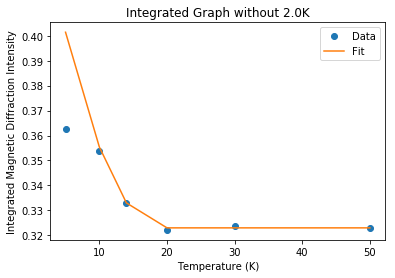

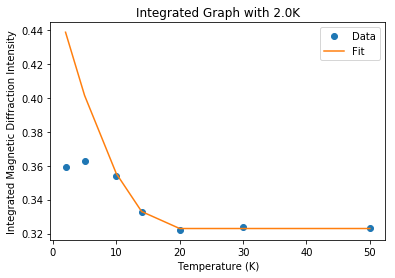

In [5]:
"""Here, I want to plot two different sets of data onto two different graphs, therefore I have to intialise two different figures and plot the data in the same way as before, with the
temperature as my independent variable and the integrated diffracted intensity as my dependent variable. Since I want my two fits to appear in the same graph as the data set they
are fitted to, I make sure to include them into the same figure."""

plt.figure(2)
plt.plot(t_vec, int_vec, 'o', label='Data')
plt.plot(t_vec, M(t_vec, 4e-4 , 19, 2, 0.323), label='Fit')
plt.title("Integrated Graph without 2.0K")
plt.xlabel("Temperature (K)")
plt.ylabel("Integrated Magnetic Diffraction Intensity")
plt.legend();

'''By using the block command, I concatenate the two missing pieces of data to the arrays I have previously created, so that
I don't have to repeat the previous commands. '''

t_vec_2 = np.block([np.array(2.0),t_vec])
int_vec_2 = np.block([np.array([trapezoid(x_data_2, y_data_2)]),int_vec])

plt.figure(3)
plt.plot(t_vec_2, int_vec_2, 'o', label='Data')
plt.plot(t_vec_2, M(t_vec_2, 4e-4 , 19, 2, 0.323), label='Fit')
plt.title("Integrated Graph with 2.0K")
plt.xlabel("Temperature (K)")
plt.ylabel("Integrated Magnetic Diffraction Intensity")
plt.legend();

We can now see our curve_fit command in action, which takes as arguments the function to fit, the array of the independent variable data, the array of the dependent variable data measured at the values of the independent variable and our guess for the parameters in a sequence of scalars (in this case, we used a tuple) which contains $A$ , $T_0$ , $\beta$ and $B$ in this order. The guess for the parameters can be omitted as it has a default value of (1, 1, 1, 1), but this would mean being too far from the actual parameters that the command wouldn't be able to return us the correct parameters for our fit and it would give an error since the covariance of the parameters wouldn't be estimable. The output of this command is a pair of arrays, a one dimensional array which contains the optimised parameters and a two dimensional array which contains the covariance between the estimate and the data set. We are interested in the first one, so we put its values into 4 variables by using tuple unpacking.

The optimised fit parameters without the 2.0K temperature are: A = 0.019594, T_0 = 14.112798, beta = 0.316535, B = 0.323070
The optimised fit parameters with the 2.0K temperature are: A = 0.024706, T_0 = 14.005408, beta = 0.176690, B = 0.323067


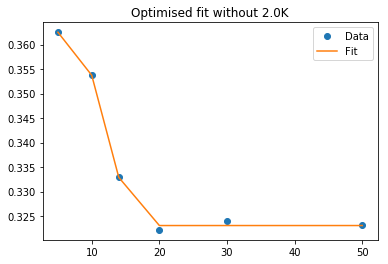

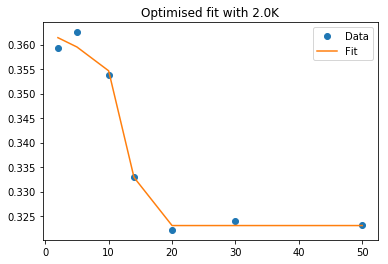

In [6]:
prm = 4e-4 , 19, 2, 0.323

'''Since the curve_fit function requires a sequence of scalars, I create a new variable prm of type tuple to contain my guess
parameters.'''

fit = op.curve_fit(M, t_vec, int_vec, prm)
a_1, b_1, c_1, d_1 = fit[0]

'''Using tuple unpacking, I distribute the optimised parameters contained in the first output array of the curve_fit command,
to which I have assigned the variable name fit, into four variables a, b, c, d which I will then proceed to use into my 
function M to plot the optmised fitted curve.'''

print("The optimised fit parameters without the 2.0K temperature are: A = {:f}, T_0 = {:f}, beta = {:f}, B = {:f}".format(a_1, b_1, c_1, d_1))

plt.figure(4)
plt.title("Optimised fit without 2.0K")
plt.plot(t_vec, int_vec, 'o', label='Data')
plt.plot(t_vec, M(t_vec, a_1, b_1, c_1, d_1), label='Fit')
plt.legend();

fit_2 = op.curve_fit(M, t_vec_2, int_vec_2, prm)
a_2, b_2, c_2, d_2 = fit_2[0]

print("The optimised fit parameters with the 2.0K temperature are: A = {:f}, T_0 = {:f}, beta = {:f}, B = {:f}".format(a_2, b_2, c_2, d_2))

plt.figure(5)
plt.title("Optimised fit with 2.0K")
plt.plot(t_vec_2, int_vec_2, 'o', label='Data')
plt.plot(t_vec_2, M(t_vec_2, a_2, b_2, c_2, d_2), label='Fit')
plt.legend();

It is now clear to see that the presence of the data point at temperature 2.0K constitutes a problem when fitting the curve to our data. To get a quantifiable measure of the "closeness" of our fitted curve to the data points, we make use of the chi-squared test. This can be implemented as the sum of the differences between the data points and the values calculated using the fitted curve, each difference squared to avoid that differences of opposite sign cancel each other and divided by the data point to normalise it. Finally the whole sum is divided by the number coefficients we are dealing with in order to get the error per coefficient.$^{[6]}$    

In [7]:
def chi_squared(x, y, coefficients):
    """This function defines the chi squared test, which aims to give a quantitative measure of the closeness of our fitted 
    curve to the data set. It takes as arguments the arrays of the independent variable, the array of the dependent variable
    calculated at the values of the independent variable and the coefficients of the fit we want to evaluate. The coefficients
    are then unpacked into four variables which become arguments of the fitted curve function. The function returns the sum of 
    the differences squared between the value of the function at the point and the value of the data set, divided by the data 
    set and finally the whole sum is divided by the number of coefficents."""
    a, b, c, d = coefficients 
    return sum(((M(x,a,b,c,d) - y)/y)**2)/4

print("The value of the chi squared test for the curve fitted to the data set without the 2.0K temperature is: {:5.2e}".format(chi_squared(t_vec, int_vec, fit[0])))
print("The value of the chi squared test for the curve fitted to the data set with the 2.0K temperature is: {:5.2e}".format(chi_squared(t_vec_2, int_vec_2, fit_2[0])))

"""Here I used the format command to have control over the output of the number. Since in this report we only are interested in the order of magnitude of our chi squared test,
I have chosen to display only the first two decimal digits.""";

The value of the chi squared test for the curve fitted to the data set without the 2.0K temperature is: 3.73e-06
The value of the chi squared test for the curve fitted to the data set with the 2.0K temperature is: 3.12e-05


Due to the method the curve_fit uses to optimise the parameters of the fit, the question of what parameters the optimised curve possesses may not look like it has a unique answer. This is because this command uses the non-linear least squares fitting, i.e. Newton-Raphson method for root finding in multiple dimensions applied to the search for the zeroes of an optimisation function. This function has four dimensions, each corresponding to the difference between the value of the curve with the current parameters and the data points, multiplied by one of the partial derivatives of the curve with respect to one of the parameters we are interested in tuning. A step of the Netwton Raphson method then, starting from an initial guess, chooses a new guess by subtracting the ratio between the value of the function at the estimate and its derivative in the chosen direction, this done for each of the four dimensions we here have. The step is repeated until the variation that the last step caused is small enough. It is intuitive to see that choosing a different starting guess, we may go in a different direction and end up at a different stopping point may the function non converge "quick enough" to the value we desire. $^{[4,5]}$  We can see this by starting from a different guess, much further from the optimised one we obtained before, with the parameters $A = 4e-4$, $T_0 = 19$ , $\beta = 2$ , $B = 0.323$.     

The optimised fit parameters without the 2.0K temperature are: A = 0.019594, T_0 = 14.112798, beta = 0.316535, B = 0.323070
The value of the chi squared test for this curve fitted to the data set is: 1.50e-03


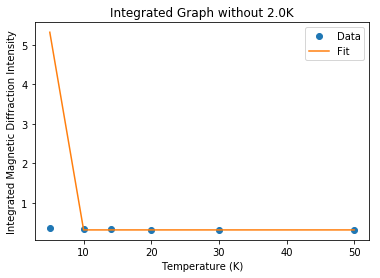

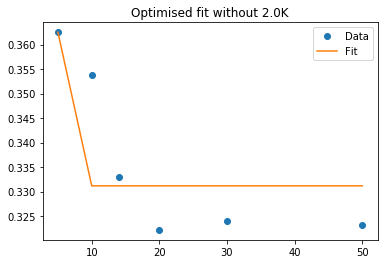

In [8]:
prm_2 = 1 , 10, 1, 0.32

plt.figure()
plt.plot(t_vec, int_vec, 'o', label='Data')
plt.plot(t_vec, M(t_vec, prm_2[0], prm_2[1], prm_2[2], prm_2[3]), label='Fit')
plt.title("Integrated Graph without 2.0K")
plt.xlabel("Temperature (K)")
plt.ylabel("Integrated Magnetic Diffraction Intensity")
plt.legend()

'''Since the curve_fit command requires the intial guess to be taken as a sequence of scalars and not as four scalar aguments, I create a new variable prm of type tuple to contain 
my guess parameters. To use it in my function M that describes the magnetisation, I have to insert as arguments my different intial parameters as different indices of my sequence
of scalars.'''

fit_3 = op.curve_fit(M, t_vec, int_vec, prm_2)
a_2, b_2, c_2, d_2 = fit_3[0]

'''Using tuple unpacking, I distribute the optimised parameters contained in the first output array of the curve_fit command, to which I have assigned the variable name fit, into 
four variables a, b, c, d which I will then proceed to use into my function M to plot the optmised fitted curve.'''

print("The optimised fit parameters without the 2.0K temperature are: A = {:f}, T_0 = {:f}, beta = {:f}, B = {:f}".format(a_1, b_1, c_1, d_1))

plt.figure()
plt.title("Optimised fit without 2.0K")
plt.plot(t_vec, int_vec, 'o', label='Data')
plt.plot(t_vec, M(t_vec, a_2, b_2, c_2, d_2), label='Fit')
plt.legend();

print("The value of the chi squared test for this curve fitted to the data set is: {:5.2e}".format(chi_squared(t_vec, int_vec, fit_3[0])))

"""Here I used the format command to have control over the output of the number. Since in this report we only are interested in the order of magnitude of our chi squared test,
I have chosen to display only the first two decimal digits.""";

**5 - Conclusion**

Regarding the first question we have posed at the start of this report, it can be considered satifyingly answered since by looking at the graph of the diffraction intensity patterns at various temperatures we can clearly see the difference in broadness of the curve when we switch from a temperature inferior to the Neel Temperature, which we have found to be $T_0 = 14.112798$ from the fit with the smallest chi square test result, to a temperature above it. This confirms our hypothesis that the material used in the experiment exhibits antiferromagnetic properties. For the second question the answer appears less clear-cut, since our suspicion that the data collected at temperature 2.0K might make a significant difference in the fitted magnetisation curve has revealed accurate. The addition of that data set to the graph gives a chi squared value that is 10 times bigger than without it, which suggests further measurement at that temperature and corrections to our models in case we find the same results again. We should also be quite careful with our choice of initial estimate for the fit parameters, since as we have shown for the same data set and the same fit optimisation method we may get quite different resuts. If not obvious at a first glance, the chi squared test is a very good indication of the grade of goodness of the fit obtained. As we have seen, with the second "further from optimal" choice of initial parameters we have gotten a chi square test result which is 1000 times bigger than the first optimal one.   

**References** 

[1] Wikipedia contributors. Antiferromagnetism [Internet]. Wikipedia, The Free Encyclopedia; 2019 Jan 8, 12:19 UTC [cited 2019 Feb 20]. Available from: https://en.wikipedia.org/w/index.php?title=Antiferromagnetism&oldid=877401092.

[2] Pato-Doldan B, Gómez-Aguirre LC, Hansen AP, Mira J, Castro-García S, Sánchez-Andújar M, Señarís-Rodríguez MA, Zapf VS, Singleton J. Magnetic transitions and isotropic versus anisotropic magnetic behaviour of [CH 3 NH 3][M (HCOO) 3] M= Mn 2+, Co 2+, Ni 2+, Cu 2+ metal–organic perovskites. Journal of Materials Chemistry C. 2016;4(47):11164-72.

[3] Phillips A. Condensed Matter A: Lecture Notes. Queen Mary University of London; 2017. 

[4] Landau R, Pa MJ, Bordeianu CC. Computational Physics: Problem Solving with Python. 3rd ed/ Weinheim: John Wiley & Sons, inc.; 2015. 

[5] Hill C. Learning Scientific Programming with Python. Cambridge University Press; 2015.

[6] Wikipedia contributors. Chi-squared test. Wikipedia, The Free Encyclopedia. February 14, 2019, 14:18 UTC. Available at: https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=883292142. Accessed February 28, 2019.